## Final Project Submission

Please fill out:
* Student name: John Kundycki 
* Student pace: Full Time
* Instructor name: Rafael Carrasco

# Obtain

In [1]:
#Import the pertinent libraries
import pandas as pd
import numpy as np

#Math
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import math

#Visual/Graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

#Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#Other Ensemble Methods
import xgboost as xgb

#Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the data
testset = pd.read_csv('testsetvalues.csv')
trainingvalues = pd.read_csv('trainingsetvalues.csv')
traininglabels = pd.read_csv('trainingsetlabels.csv')

In [3]:
#Display all rows/cols
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Explore the datasets by checking columns/stats

In [4]:
testset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
trainingvalues.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
traininglabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
#Merge the training values and training labels on the id column
trainingset = pd.merge(trainingvalues, traininglabels, on='id', how='outer')

In [8]:
#Verify that merge was properly accomplished
trainingset.head(50)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallo

In [9]:
#Check value counts of target in traning set
trainingset.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [10]:
#Check shape of both training and test sets
display(testset.shape)
display(trainingset.shape)

(14850, 40)

(59400, 41)

After an initial look at the data, the target will be the status_group of the wells. The testing set will be trained on the training set.

# Column Names and Descriptions

amount_tsh - Total static head (amount water available to waterpoint) \
date_recorded - The date the row was entered \
funder - Who funded the well \
gps_height - Altitude of the well \
installer - Organization that installed the well \
longitude - GPS coordinate \
latitude - GPS coordinate \
wpt_name - Name of the waterpoint if there is one \
num_private - \
basin - Geographic water basin \
subvillage - Geographic location \
region - Geographic location \
region_code - Geographic location (coded) \
district_code - Geographic location (coded) \
lga - Geographic location \
ward - Geographic location \
population - Population around the well \
public_meeting - True/False \
recorded_by - Group entering this row of data \
scheme_management - Who operates the waterpoint \ 
scheme_name - Who operates the waterpoint \
permit - If the waterpoint is permitted \
construction_year - Year the waterpoint was constructed \
extraction_type - The kind of extraction the waterpoint uses \
extraction_type_group - The kind of extraction the waterpoint uses \
extraction_type_class - The kind of extraction the waterpoint uses \
management - How the waterpoint is managed \ 
management_group - How the waterpoint is managed \
payment - What the water costs \
payment_type - What the water costs \
water_quality - The quality of the water \ 
quality_group - The quality of the water \
quantity - The quantity of water \
quantity_group - The quantity of water \
source - The source of the water \
source_type - The source of the water \
source_class - The source of the water \
waterpoint_type - The kind of waterpoint \
waterpoint_type_group - The kind of waterpoint

# Scrub

In [11]:
#Import Data from the DataCleaning file
train_scrubbed = pd.read_csv('scrubbed_trainingset.csv')
test_scrubbed = pd.read_csv('scrubbed_testset.csv')

In [12]:
#Create instances of cleaned data without the index or id columns
dftrain = train_scrubbed.drop(['Unnamed: 0','id'], axis=1)
dftest = test_scrubbed.drop(['Unnamed: 0','id'], axis=1)

# Explore

## Visualization of features

Visualize the target, Pump Functionality.

Text(0.5, 0, 'Normalized Value Counts')

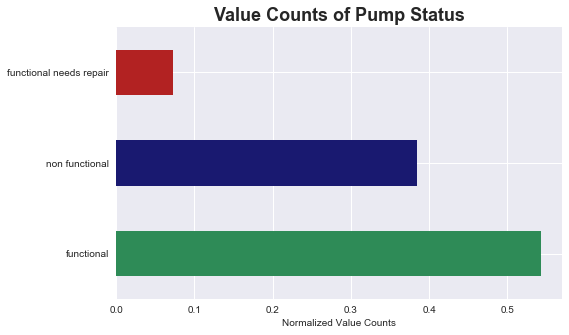

In [13]:
#Bar Graph of the normalized value counts for status_group
trainingset['status_group'].value_counts(normalize=True).plot(kind='barh', figsize=(8,5), color=['seagreen','midnightblue','firebrick'])
plt.title("Value Counts of Pump Status", fontweight='bold', fontsize=18)
plt.xlabel('Normalized Value Counts',fontsize=10)

In [14]:
trainingset['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

From the graph, we see there is an even distribution between functional wells and those that are in jeopardy. Also, class imbalance can be observed.

## Explore the relationships of the different features through visualizations to see if there are any interesting or apparent trends.

### Question 1: Do payment plans have any effect on pump functionality?

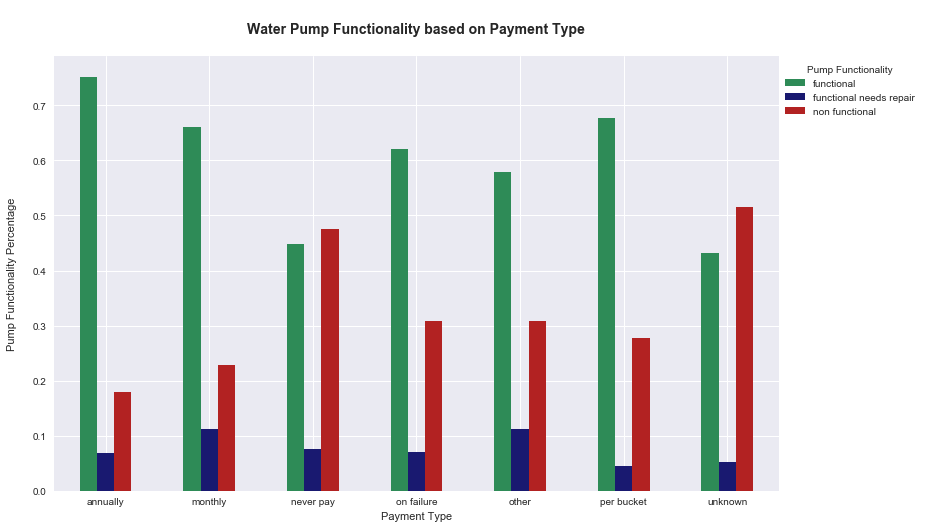

In [15]:
sub_df = trainingset.groupby('payment_type')['status_group'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar',  color=['seagreen','midnightblue','firebrick'], figsize=(13,8))
plt.xlabel("Payment Type")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Percentage\n")
plt.title('\nWater Pump Functionality based on Payment Type\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Pump Functionality');

From the data, it can be observed that pumps that are never paid for tend to have more non-functional pumps. The unknown category is likely to be more pumps that are never paid, based on the similarity of pump functionality distribution. Finally, it seems that those that pay in planned time increments tend to have less non-functional pumps than those that are paid for by quantity or failure.

### Question 2: How does the age of a well relate to it's functionality?

In [16]:
#Create a copy of the dataset to manipulate with little consequence
age_df = pd.DataFrame([])
age_df['status_group'] = trainingset['status_group']
age_df['construction_year'] = trainingset['construction_year']
age_df.head(2)

,status_group,construction_year
0,functional,1999
1,functional,2010


In [17]:
#Get rid of those with year 0 for visualization
year_zero = age_df[age_df['construction_year'] == 0 ].index
age_df.drop(year_zero , inplace=True)

In [18]:
#Create bins for construction_year so the data can be grouped into time periods

bins = [1960., 1970., 1980., 1990., 2000., 2010.,2013.]
periods = ['1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2013']

age_df['construction_periods'] = pd.cut(age_df['construction_year'], bins, labels=periods, right=False)

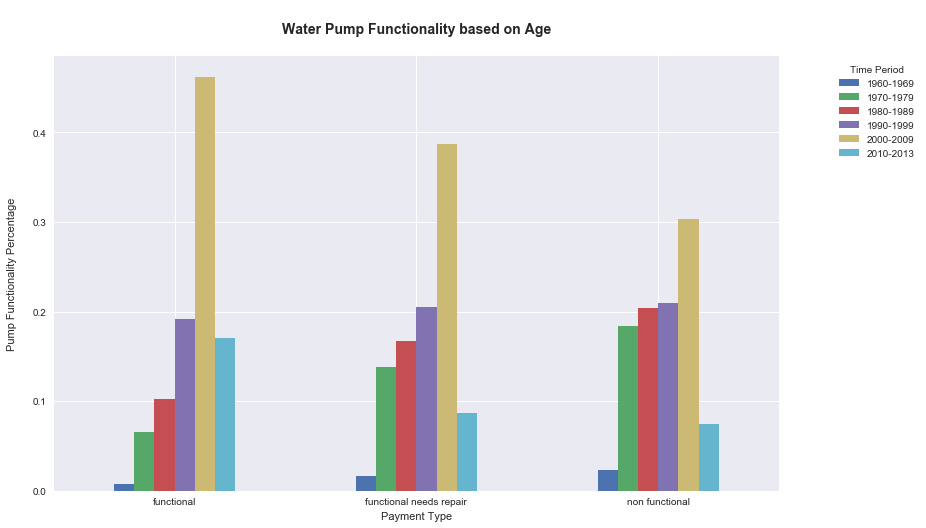

In [19]:
sub_df = age_df.groupby('status_group')['construction_periods'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', figsize=(13,8))
plt.xlabel("Payment Type")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Percentage\n")
plt.title('\nWater Pump Functionality based on Age\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Time Period');

It appears that a greater number of the non-functional pumps tend to be older. And more recently constructed pumps (2000s and on) seem to be more likely to be functional.

### Question 3: How are Water Quantity and Water Pump Functionality related?

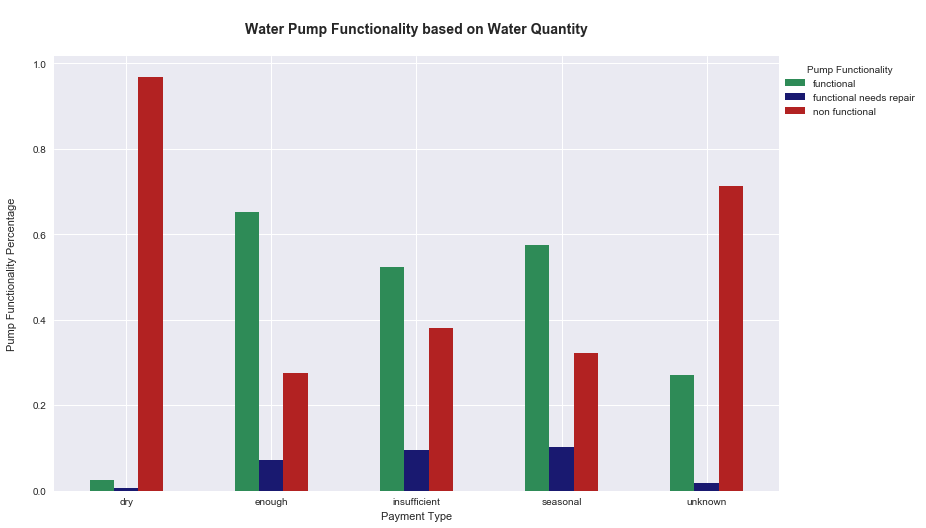

In [20]:
sub_df = trainingset.groupby('quantity')['status_group'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['seagreen','midnightblue','firebrick'], figsize=(13,8))
plt.xlabel("Payment Type")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality Percentage\n")
plt.title('\nWater Pump Functionality based on Water Quantity\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Pump Functionality');

Pumps that are dry tend to be non-functional. Wells with enough water tend to be more functional than their counterparts. The unknown data is likely dry as many of the water pumps are non-functional, which can be seen in the "dry" category.

### Question 4: How are Water Source and Quantity related?

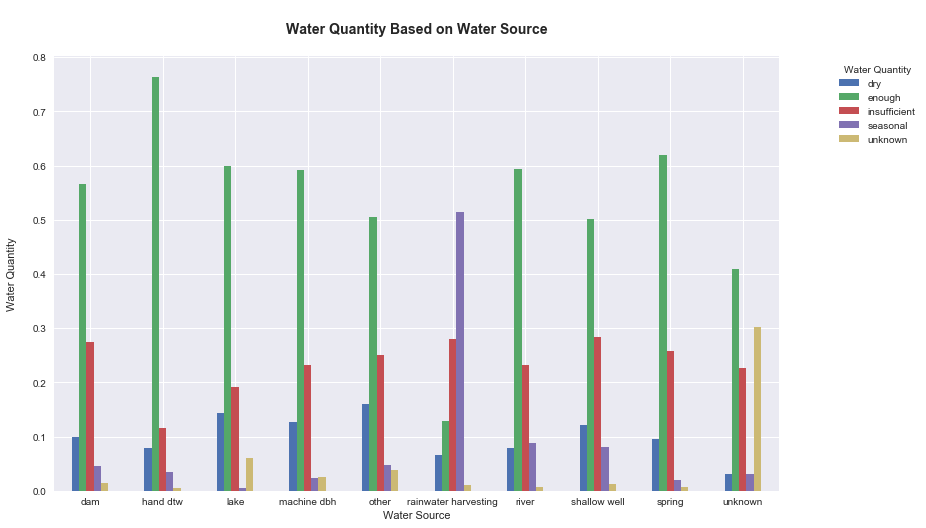

In [21]:
sub_df = trainingset.groupby('source')['quantity'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', figsize=(13,8))
plt.xlabel("Water Source")
plt.xticks(rotation=0)
plt.ylabel("Water Quantity\n")
plt.title('\nWater Quantity Based on Water Source\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Water Quantity');

This graph brings light as to which water sources may need more attention or which sources are the best when deciding to build a pump.

### Question 5: Does Geographic Location matter when it comes to Pump Functionality?

In [22]:
#Drop wells with no geographical location
missing = trainingset[trainingset['longitude'] == 0 ].index
trainingset.drop(missing , inplace=True)

In [23]:
geo_df = pd.DataFrame([])
geo_df['status_group'] = trainingset['status_group']
geo_df['longitude'] = trainingset['longitude']
geo_df['latitude'] = trainingset['latitude']
geo_df.head(2)

,status_group,longitude,latitude
0,functional,34.938093,-9.856322
1,functional,34.698766,-2.147466


In [24]:
geo_df['status'] = np.zeros(shape=geo_df.shape[0])

In [25]:
status = []

for i in geo_df.status_group:
    if i == 'functional':
        status.append(20)
    if i == 'non functional':
        status.append(0)
    if i == 'functional needs repair':
        status.append(10)
geo_df.status = status

In [26]:
geo_df.head()

,status_group,longitude,latitude,status
0,functional,34.938093,-9.856322,20
1,functional,34.698766,-2.147466,20
2,functional,37.460664,-3.821329,20
3,non functional,38.486161,-11.155298,0
4,functional,31.130847,-1.825359,20


<Figure size 936x576 with 0 Axes>

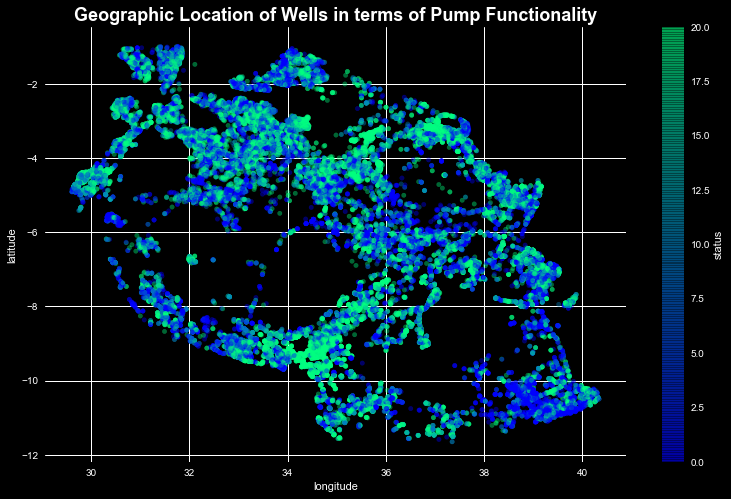

In [27]:
#Heat map to view geographical locations of wells
plt.style.use("dark_background")
plt.figure(figsize=(13,8))
geo_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(13,8), 
        c="status", cmap="winter", colorbar=True, sharex=False);
plt.title("Geographic Location of Wells in terms of Pump Functionality", fontweight='bold', fontsize=18)
plt.show()

Although there is decent mix of pump functionality, there appear to be pockets of concentrations of each category in certain areas such as the south west containing many non-functional pumps.

In [28]:
#Revert back to the seaborn plot style
plt.style.use('seaborn')

### Question 6: How are basin and pump functionality related?

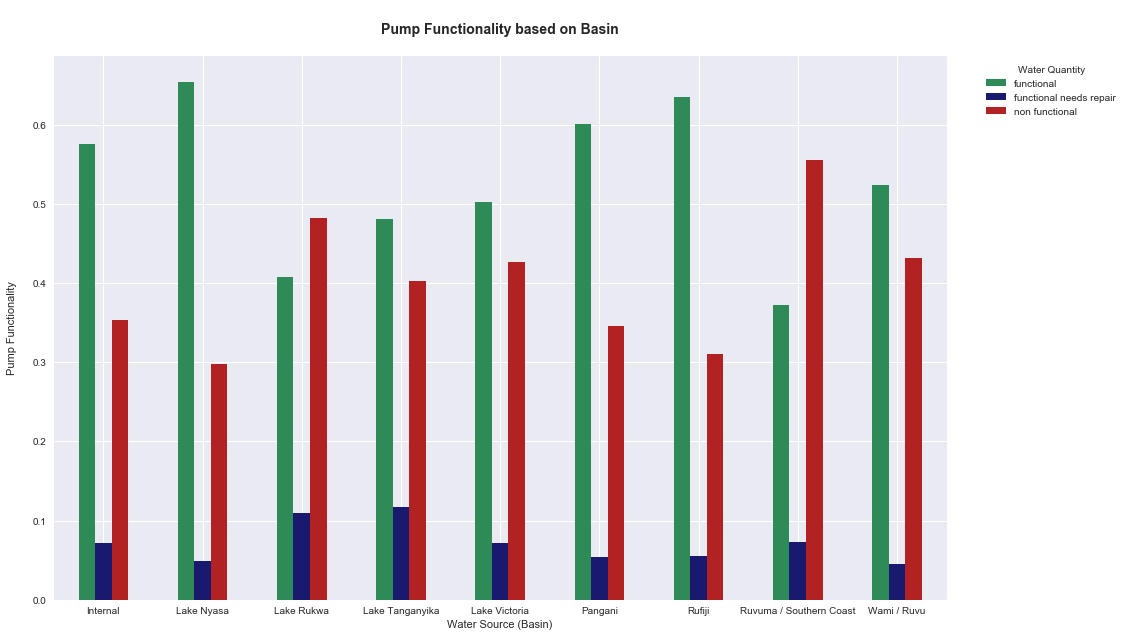

In [29]:
sub_df = trainingset.groupby('basin')['status_group'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['seagreen','midnightblue','firebrick'], figsize=(16,10))
plt.xlabel("Water Source (Basin)")
plt.xticks(rotation=0)
plt.ylabel("Pump Functionality\n")
plt.title('\nPump Functionality based on Basin\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Water Quantity');

This graph visualizes which basins tend to need more focus and which tend to perform better. 

# Model

In [30]:
#Random Forest / Gridsearch / XGBoost

In [31]:
#Create df with only categorical features to be dummified
categorical_features = dftrain.copy()
categorical_features.drop(['amount_tsh','gps_height','population','days_since_recorded'], axis=1, inplace=True)

In [32]:
#Define target
target = traininglabels['status_group']

In [33]:
#Create dummy variables
feature_dummies = pd.get_dummies(categorical_features)

In [34]:
display(feature_dummies.shape)

(59400, 95)

In [35]:
feature_dummies['amount_tsh'] = dftrain['amount_tsh']
feature_dummies['gps_height'] = dftrain['gps_height']
feature_dummies['population'] = dftrain['population']
feature_dummies['days_since_recorded'] = dftrain['days_since_recorded']

In [36]:
display(feature_dummies.shape)

(59400, 99)

In [65]:
# Train Test Split, 80% Training set / 20% Test Set
X_train, X_test, y_train, y_test = train_test_split(feature_dummies, target, test_size=0.2)

### Random Forest

In [38]:
#Instantiate the RandomForestClassifier for GridsearchCV
forest = RandomForestClassifier()

In [39]:
#Create a Grid for GridsearchCV to find the best parameters for the classifier
rf_param_grid = {'n_estimators': [100,250,500,1000],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 2, 6, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [2, 3, 6]}

gs_tree = GridSearchCV(forest, rf_param_grid, cv=3)

gs_tree.fit(X_train, y_train)
print(gs_tree.best_params_)

KeyboardInterrupt: 

In [40]:
#Instantiate a RandomForestClassifier with the parameters determined by the GridSearchCV
forest = RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42)

#Train the data on the model
forest.fit(X_train, y_train)

#Predictions for the training and test set
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

#Create Classification Result
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)


print("Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

# append accuracy score to our dataframe
score_forest = ['Random Forest', train_accuracy_forest, test_accuracy_forest]

Random Forest
-------------------------
Training Accuracy: 86.5%
Test Accuracy:     80.37%


The training accuracy is significantly higher than the test set, which could be a sign of overfitting.

### XGBoost

In [41]:
#Instantiate the Classifier
xgboost = xgb.XGBClassifier()

In [ ]:
#Create a Grid for GridsearchCV to find the best parameters for the classifier
xg_param_grid = {'n_estimators': [200],
              'learning_rate': [0.05, 0.1], 
              'max_depth': [6,7],
              'colsample_bytree': [0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

xg_search = GridSearchCV(xgboost, xg_param_grid, scoring='accuracy', cv=3)

xg_search.fit(X_train, y_train)

print(xg_search.best_params_)

In [42]:
# Instantiate the XGBoost classifier using GridSearchCV hyperparameters
booster = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200,
                            colsample_bytree=0.7, gamma=0.1, random_state=42)

#Train the data on the model
booster.fit(X_train, y_train)

#Predictions for the training and test set
train_preds = booster.predict(X_train)
test_preds = booster.predict(X_test)

#Create Classification Result
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

XGBoost
-------------------------
Training Accuracy: 81.71%
Test Accuracy:     79.04%


In [43]:
#Print Classification Reports for both models
print('Classification Report Random Forest: \n', report_forest)
print('------------------------------------------------------')
print('Classification Report XGBoost: \n', report_booster)

Classification Report Random Forest: 
                          precision    recall  f1-score   support

             functional       0.79      0.92      0.85      6518
functional needs repair       0.64      0.24      0.35       837
         non functional       0.85      0.74      0.79      4525

               accuracy                           0.80     11880
              macro avg       0.76      0.63      0.66     11880
           weighted avg       0.80      0.80      0.79     11880

------------------------------------------------------
Classification Report XGBoost: 
                          precision    recall  f1-score   support

             functional       0.77      0.92      0.84      6518
functional needs repair       0.67      0.22      0.33       837
         non functional       0.84      0.71      0.77      4525

               accuracy                           0.79     11880
              macro avg       0.76      0.62      0.65     11880
           weighted avg

## Dealing with Class Imbalance

There is class imbalance in our target. By balancing the data, we can remove the bias caused by this class imbalance. The data will be resampled using SMOTE.

In [44]:
#Import SMOTE
from imblearn.over_sampling import SMOTE

In [45]:
#Compare previous and resampled target counts
#Print imbalanced target
print(traininglabels['status_group'].value_counts())

#SMOTE to balance the data
X_SMOTE, y_SMOTE = SMOTE().fit_sample(X_train, y_train)

#Print balanced target
print(pd.Series(y_SMOTE).value_counts())

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


C:\Users\John\Anaconda3\envs\learn-env\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


functional needs repair    25741
functional                 25741
non functional             18299
dtype: int64


In [46]:
#Train test split the SMOTE data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_SMOTE, y_SMOTE, random_state=42)

### Random Forest (SMOTE):

In [47]:
#Instantiate a RandomForestClassifier with the parameters determined by the GridSearchCV
forest = RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42)

#Train the data on the model
forest.fit(X_train, y_train)

#Predictions for the training and test set
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

#Create Classification Result
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest = classification_report(y_test, test_preds)


print("Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

# append accuracy score to our dataframe
score_forest = ['Random Forest', train_accuracy_forest, test_accuracy_forest]

Random Forest
-------------------------
Training Accuracy: 90.54%
Test Accuracy:     84.56%


### XGBoost (SMOTE):

In [48]:
# Instantiate the XGBoost classifier using GridSearchCV hyperparameters
booster = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200,
                            colsample_bytree=0.7, gamma=0.1, random_state=42)

#Train the data on the model
booster.fit(X_train, y_train)

#Predictions for the training and test set
train_preds = booster.predict(X_train)
test_preds = booster.predict(X_test)

#Create Classification Result
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

XGBoost
-------------------------
Training Accuracy: 85.68%
Test Accuracy:     82.54%


In [49]:
#Print Classification Reports for both models
print('Classification Report Random Forest: \n', report_forest)
print('------------------------------------------------------')
print('Classification Report XGBoost: \n', report_booster)

Classification Report Random Forest: 
                          precision    recall  f1-score   support

             functional       0.78      0.86      0.82      6403
functional needs repair       0.91      0.92      0.91      6432
         non functional       0.86      0.73      0.79      4611

               accuracy                           0.85     17446
              macro avg       0.85      0.83      0.84     17446
           weighted avg       0.85      0.85      0.84     17446

------------------------------------------------------
Classification Report XGBoost: 
                          precision    recall  f1-score   support

             functional       0.75      0.87      0.80      6403
functional needs repair       0.90      0.89      0.90      6432
         non functional       0.84      0.68      0.75      4611

               accuracy                           0.83     17446
              macro avg       0.83      0.81      0.82     17446
           weighted avg

## Using models to make predictions on the test set

The models will be used to predict the test data and will be submitted to the website to see how the models did.

### Preparing the test data

In [50]:
#Create df with only categorical features to be dummified
categorical_features2 = dftest.copy()
categorical_features2.drop(['amount_tsh','gps_height','population','days_since_recorded'], axis=1, inplace=True)

In [51]:
#Create dummy variables
feature_dummies2 = pd.get_dummies(categorical_features2)

In [52]:
display(feature_dummies2.shape)

(14850, 95)

In [53]:
feature_dummies2['amount_tsh'] = dftest['amount_tsh']
feature_dummies2['gps_height'] = dftest['gps_height']
feature_dummies2['population'] = dftest['population']
feature_dummies2['days_since_recorded'] = dftest['days_since_recorded']

In [54]:
display(feature_dummies2.shape)

(14850, 99)

### Random Forest Prediction

In [55]:
forest_preds = forest.predict(feature_dummies2)

In [56]:
forest_preds

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [57]:
submission = pd.read_csv('SubmissionFormat.csv')

In [58]:
submission.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [59]:
submission['status_group'] = forest_preds

In [60]:
submission.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [97]:
submission.to_csv("../forestpreds.csv")

This model scored 0.7842 on the competition website.

# Interpret

In [80]:
from IPython.display import Image

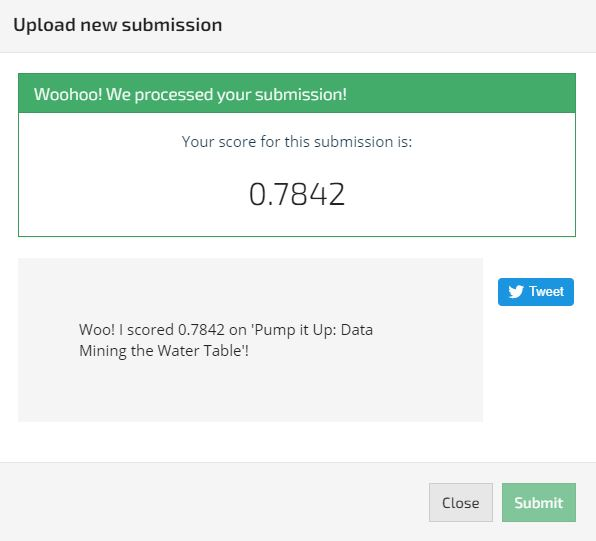

In [81]:
Image("images/forest_pred_results.jpg")

The model did well, predicting 78.42% of the data from the test set when submitted on the website. Some things that could be done to improve the model are likely running longer GridSearchCV, which I did not have time to do. There are probably better hyperparameter tunings that would improve the model. The narrowing of features could be explored more to see if improvements could be made by selecting different columns sharing similar information or narrowing down the categories differently.

## Feature Importance

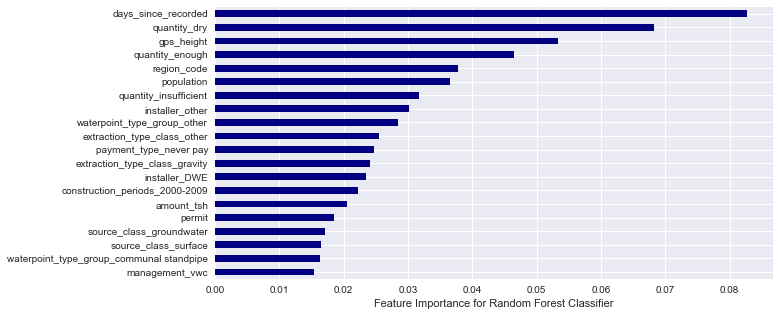

In [70]:
#Check the top 20 important features for RandomForest
feat_importances = pd.Series(forest.feature_importances_, index=feature_dummies.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh', color='navy', figsize=(10,5))
plt.xlabel('Feature Importance for Random Forest Classifier');

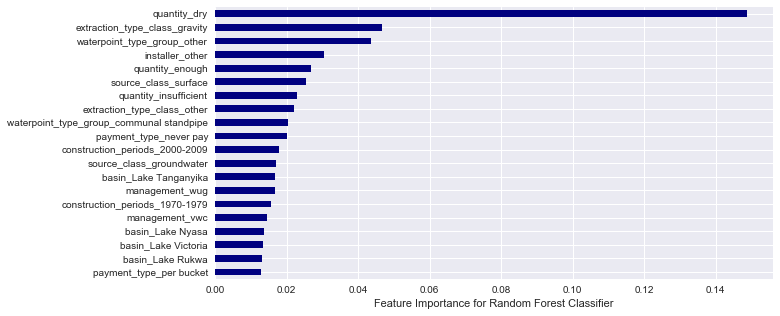

In [71]:
#Check the top 20 important features for XGBoost
feat_importances = pd.Series(booster.feature_importances_, index=feature_dummies.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh', color='navy', figsize=(10,5))
plt.xlabel('Feature Importance for Random Forest Classifier');